In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

archivo = 'archivo_EN.csv'
df = pd.read_csv(archivo)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62768 entries, 0 to 62767
Data columns (total 47 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID Empleado                          62768 non-null  int64  
 1   Edad+norm                            62768 non-null  float64
 2   Género+norm                          62768 non-null  float64
 3   Antigüedad en la Empresa+norm        62768 non-null  float64
 4   Rol de Trabajo+norm                  62768 non-null  float64
 5   Ingreso Mensual+norm                 62768 non-null  float64
 6   Balance Trabajo-Vida+norm            62768 non-null  float64
 7   Satisfacción del Trabajo+norm        62768 non-null  float64
 8   Desempeño+norm                       62768 non-null  float64
 9   Número de Promociones+norm           62768 non-null  float64
 10  Horas Extras+norm                    62768 non-null  float64
 11  Distancia a Casa+norm       

## Pregunta a resolver:
### Predicción: ¿Cuál es la probabilidad de que un empleado deje la empresa en función de su antigüedad, satisfacción laboral, oportunidades de liderazgo y balance trabajo-vida?
### Clasificación: ¿Qué puntuación de satisfacción laboral se puede asignar a un empleado considerando el balance trabajo-vida, la reputación de la empresa y las oportunidades de liderazgo?

* Características: Antigüedad, Satisfacción Laboral, Oportunidades de Liderazgo y Balance Trabajo-Vida
* Variable a predecir: Deserción

<Figure size 600x600 with 0 Axes>

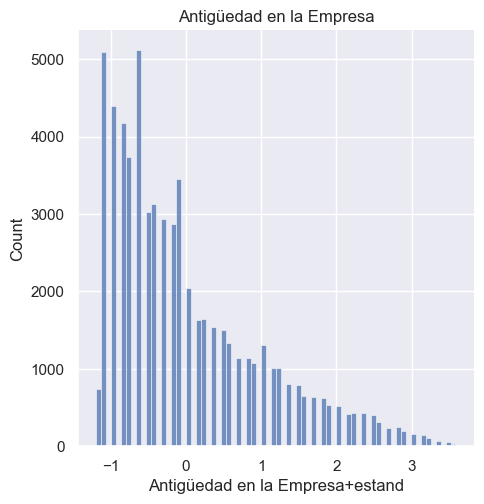

In [13]:
sns.set_theme()
plt.figure(figsize=(6,6))
sns.displot(df['Antigüedad en la Empresa+estand'])
plt.title('Antigüedad en la Empresa')
plt.show()

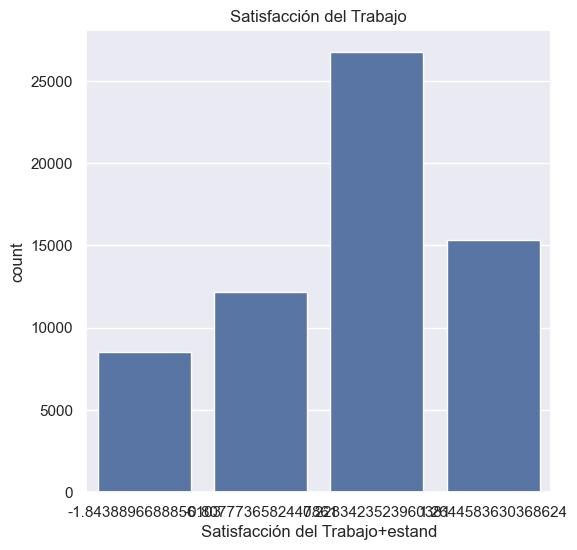

Satisfacción del Trabajo+estand
 0.228342    26739
 1.264458    15346
-0.807774    12187
-1.843890     8496
Name: count, dtype: int64

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(x='Satisfacción del Trabajo+estand', data=df)
plt.title('Satisfacción del Trabajo')
plt.show()
df['Satisfacción del Trabajo+estand'].value_counts()

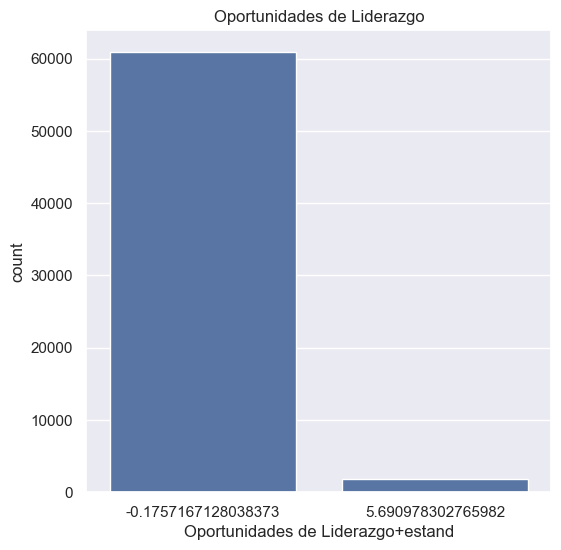

Oportunidades de Liderazgo+estand
-0.175717    60888
 5.690978     1880
Name: count, dtype: int64

In [15]:
plt.figure(figsize=(6,6))
sns.countplot(x='Oportunidades de Liderazgo+estand', data=df)
plt.title('Oportunidades de Liderazgo')
plt.show()
df['Oportunidades de Liderazgo+estand'].value_counts()

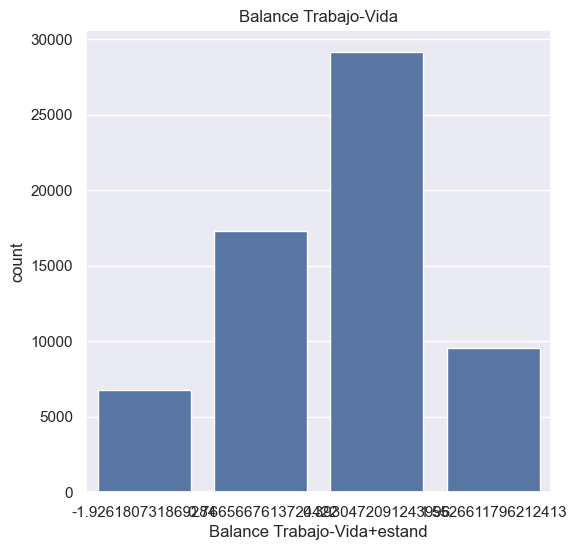

Balance Trabajo-Vida+estand
 0.393047    29135
-0.766567    17326
 1.552661     9555
-1.926181     6752
Name: count, dtype: int64

In [16]:
plt.figure(figsize=(6,6))
sns.countplot(x='Balance Trabajo-Vida+estand', data=df)
plt.title('Balance Trabajo-Vida')
plt.show()
df['Balance Trabajo-Vida+estand'].value_counts()

In [17]:
X = df[['Antigüedad en la Empresa+estand', 'Satisfacción del Trabajo+estand', 'Oportunidades de Liderazgo+estand', 'Balance Trabajo-Vida+estand']]
Y = df['Deserción+estand']

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [19]:
print(X.shape, X_train.shape, X_test.shape)

(62768, 4) (50214, 4) (12554, 4)


In [20]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [21]:
from sklearn import metrics
# Veamos qué predice para nuestro conjunto de entrenamiento
training_data_prediction = regressor.predict(X_train)

# Como es un modelo de regresión, miremos el R2 (estamos usando varias columnas)
r2_train = metrics.r2_score(Y_train, training_data_prediction) # Comparo etiqueta original con la predicha
print('Valor de R2: ', r2_train)

rmse = metrics.mean_squared_error(Y_train, training_data_prediction, squared=False)
print('Valor RMSE: ', rmse)

mae = metrics.mean_absolute_error(Y_train, training_data_prediction)
print('Valor MAE: ', mae)

Valor de R2:  0.0295690811012691
Valor RMSE:  0.9834471614839375
Valor MAE:  0.9278181233961448


c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [22]:
test_data_prediction = regressor.predict(X_test)

In [23]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('Valor R2 (prueba): ', r2_test)

rmse = metrics.mean_squared_error(Y_test, test_data_prediction, squared=False)
print('Valor RMSE: ', rmse)

mae = metrics.mean_absolute_error(Y_test, test_data_prediction)
print('Valor MAE: ', mae)

Valor R2 (prueba):  0.02925639139842462
Valor RMSE:  0.9915525121415104
Valor MAE:  0.935084285097305


c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [35]:
# Nos encontramos con una nueva instancia:  (mismo orden que el dataset original!)
#   Antigüedad en la Empresa: 20 años
#   Satisfacción del Trabajo: High (2)
#   Oportunidades de Liderazgo: 1
#   Balance Trabajo-Vida: Good (2)

import numpy as np
from sklearn.preprocessing import StandardScaler

input_data = [20,2,1,2]

# Convertir los valores a un array de numpy
values = np.array(input_data, dtype=float).reshape(-1, 1)

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar el escalador a los valores y luego transformarlos
values_scaled = scaler.fit_transform(values)

print("Valores originales:", values.flatten())
print("Valores estandarizados:", values_scaled.flatten())

#Llevemos los datos de entrada a lo que espera nuestro algoritmo...
input_data_as_numpy_array = np.asarray(values_scaled)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Tomemos una decisión (veamos cuál es la carga de seguro médico que le correspondería)
prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('El empleado abandonará la empresa?: ', prediction[0])

Valores originales: [20.  2.  1.  2.]
Valores estandarizados: [ 1.72976503 -0.53465464 -0.66045574 -0.53465464]
[0.1269155]
El empleado abandonará la empresa?:  0.12691550464325643


c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [42]:
# Nos encontramos con una nueva instancia:  (mismo orden que el dataset original!)
#   Antigüedad en la Empresa: 2 años
#   Satisfacción del Trabajo: (0)
#   Oportunidades de Liderazgo: (0)
#   Balance Trabajo-Vida: Bad (1)

import numpy as np
from sklearn.preprocessing import StandardScaler

input_data = [10,3,1,3]

# Convertir los valores a un array de numpy
values = np.array(input_data, dtype=float).reshape(-1, 1)

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar el escalador a los valores y luego transformarlos
values_scaled = scaler.fit_transform(values)

print("Valores originales:", values.flatten())
print("Valores estandarizados:", values_scaled.flatten())

#Llevemos los datos de entrada a lo que espera nuestro algoritmo...
input_data_as_numpy_array = np.asarray(values_scaled)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Tomemos una decisión (veamos cuál es la carga de seguro médico que le correspondería)
prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('El empleado abandonará la empresa?: ', prediction[0])

Valores originales: [10.  3.  1.  3.]
Valores estandarizados: [ 1.68192658 -0.36563621 -0.95065415 -0.36563621]
[0.09086372]
El empleado abandonará la empresa?:  0.09086372289000604


c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
